In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from floor import FloorPlan

import random
from grid import *
from wfc import *
from utils import *
from floor import *
import cv2 as cv
import os

file calledfloor_1_medium.png
file calledfloor_2_medium.png
file calledfloor_3_medium.png
file calledfloor_4_medium.png
file calledfloor_5_medium.png


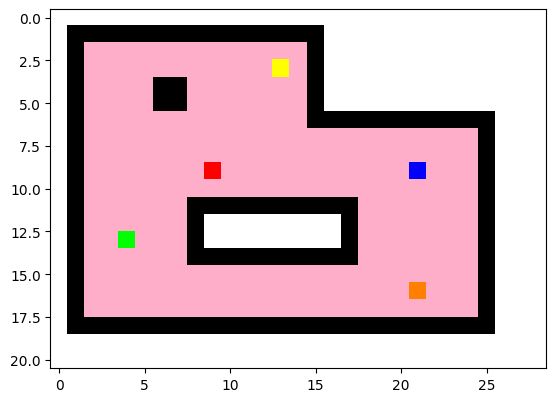

In [2]:
floorplans = []
data_dir = "data/pre_defined/medium/"
for filename in os.listdir(data_dir):
    if filename.lower().endswith(('.png', 'jpeg')):
        print(f"file called{filename}")
        filepath = os.path.join(data_dir, filename)
        floorplan = cv.imread(filepath)
        floorplan = cv.cvtColor(floorplan, cv.COLOR_BGR2RGB)
        plt.imshow(floorplan)
        floorplans.append(floorplan)

## Batch Processing of Floorplans

We iterate over each raw floorplan image, convert it to an integer grid plus seed list, visualize the initial seeds, grow rooms, add stairs and corridors, upscale to a 3×3 tile representation, and visualize the final result.

- **`floorplans_int`**: collects the raw integer grids for further analysis or saving.  
- **`all_seeds`**: (optional) could store every seed list if you need them later.  
- **Visualization steps**: we call `fp.show()` before and after major modifications to inspect the layout and door placements.


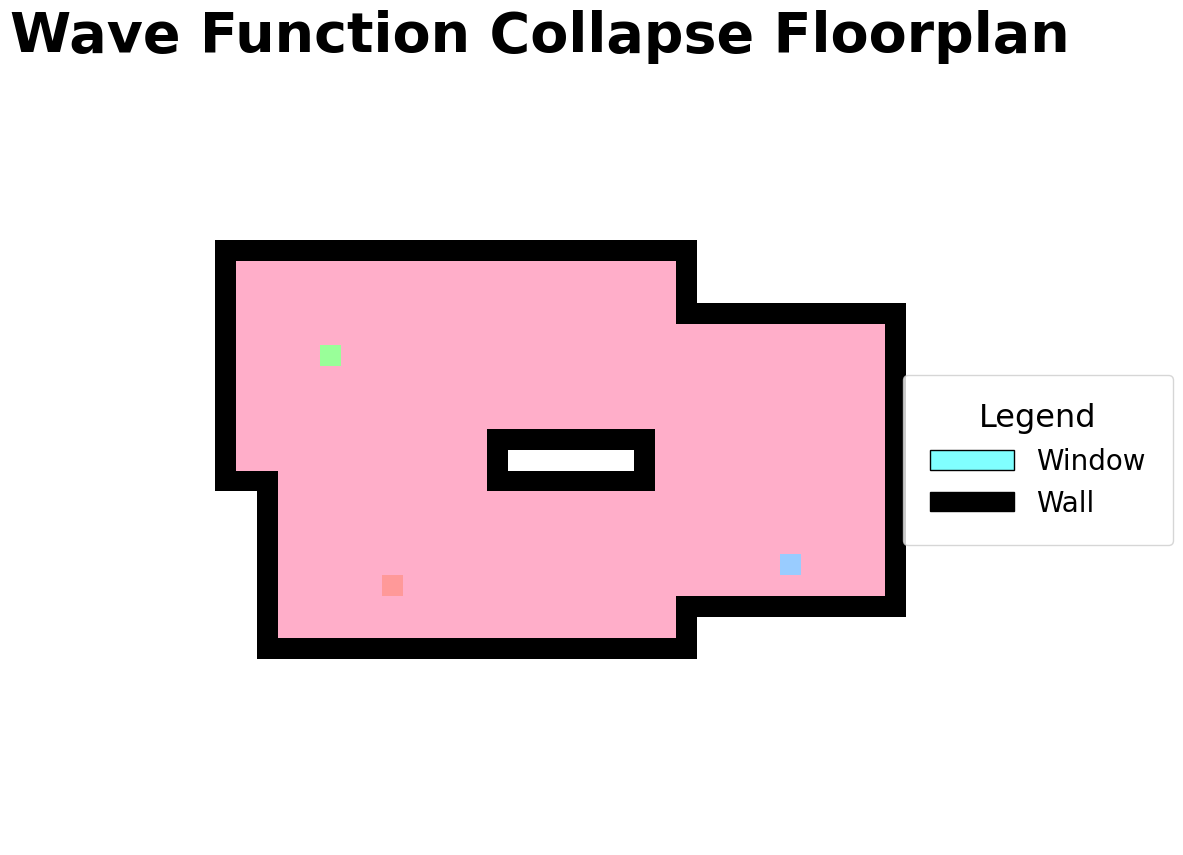

[(2, 5), (2, 25), (4, 25), (4, 35), (10, 3), (10, 5), (10, 17), (10, 23), (11, 16), (12, 16), (12, 23), (18, 25), (18, 35), (21, 3), (21, 25)]


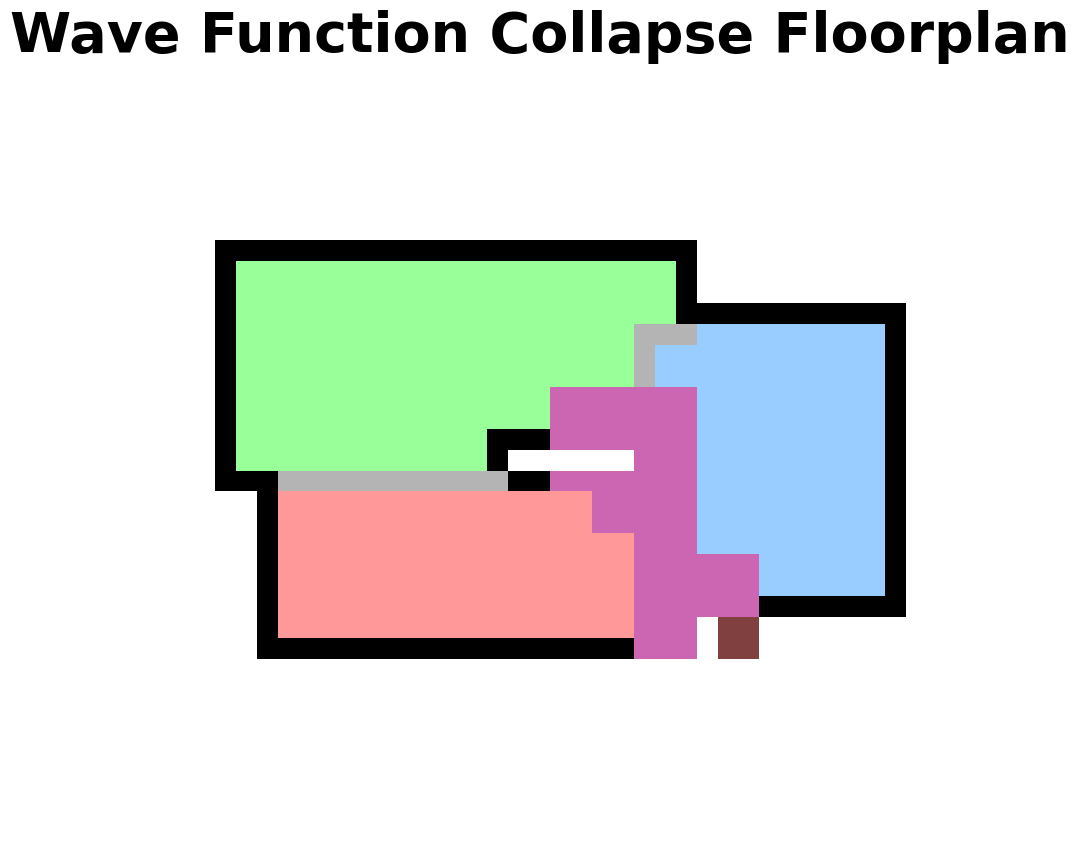

POOOGGGGG[20, 128, 129, 130]
POOOGGGGG[128, 129, 130]
POOOGGGGG[129, 130]
POOOGGGGG[130]


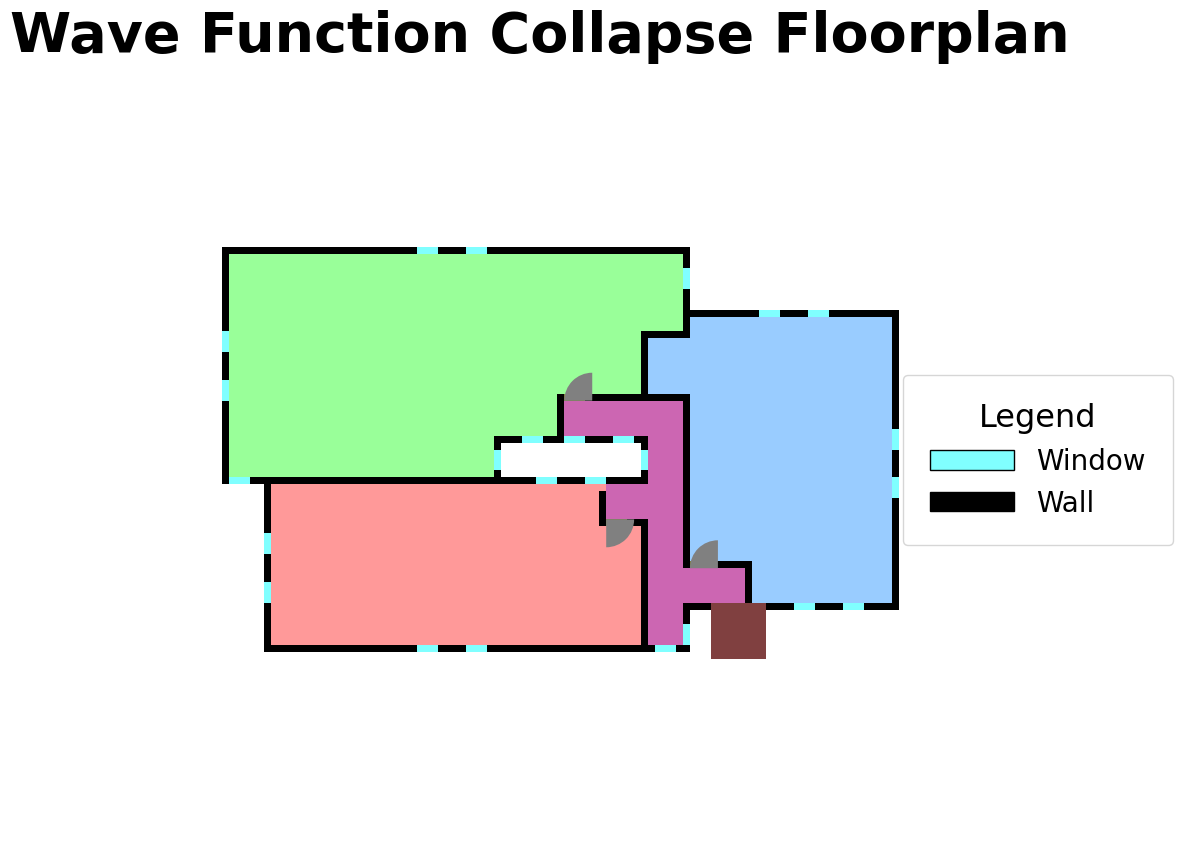

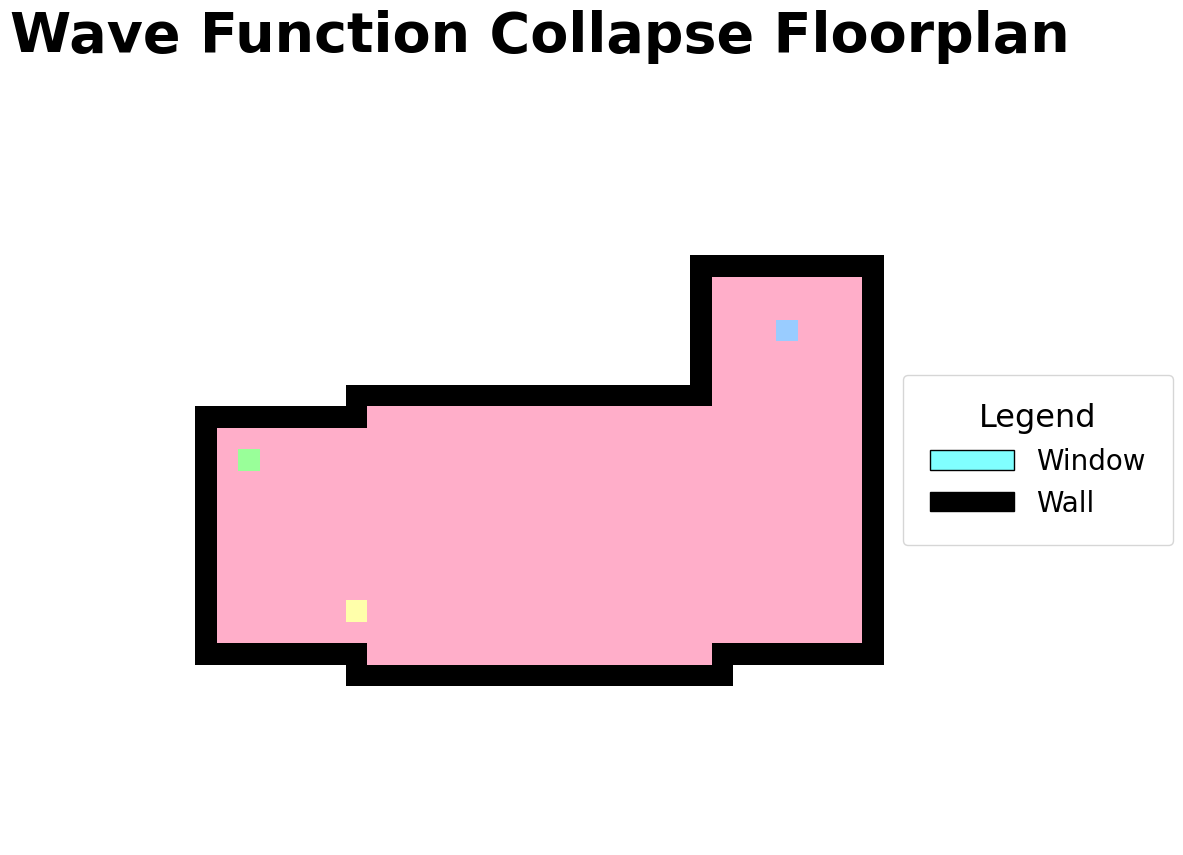

[(1, 9), (1, 26), (2, 2), (2, 9), (2, 26), (2, 33), (13, 2), (13, 9), (14, 9), (14, 25), (20, 25), (20, 33)]


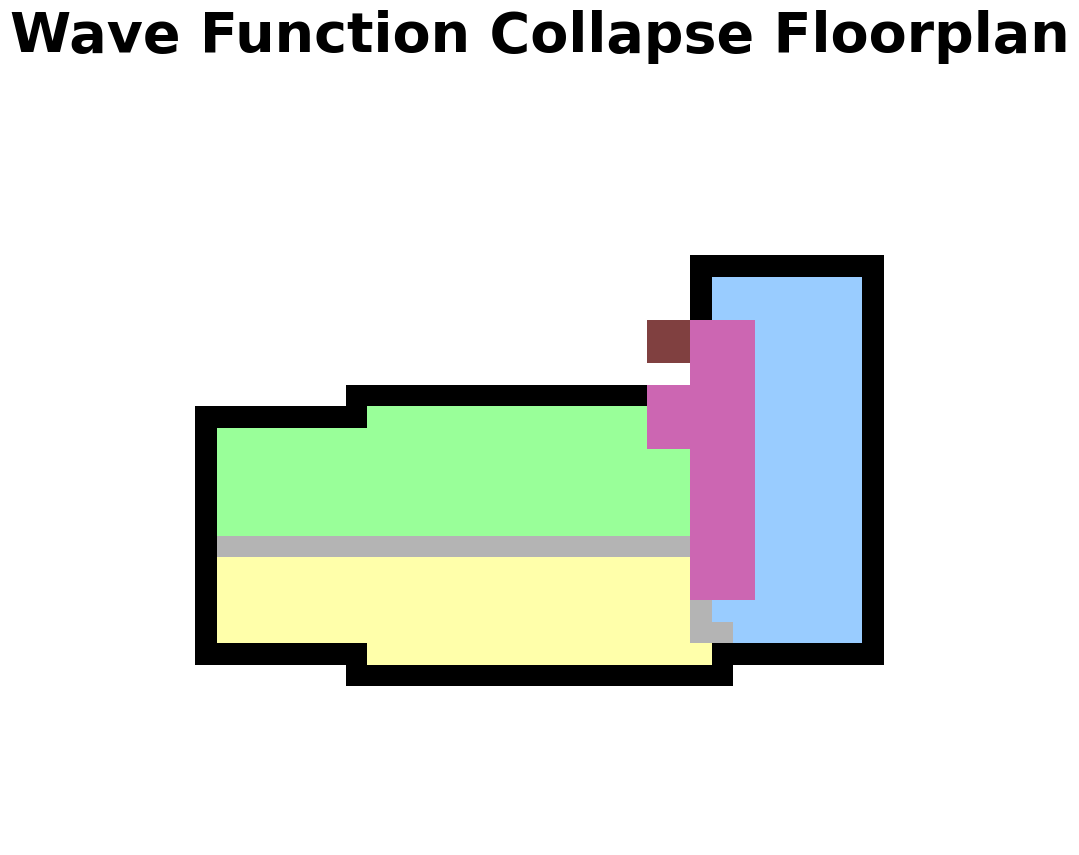

POOOGGGGG[144, 129, 130, 20]
POOOGGGGG[129, 130, 20]
POOOGGGGG[130, 20]
POOOGGGGG[20]


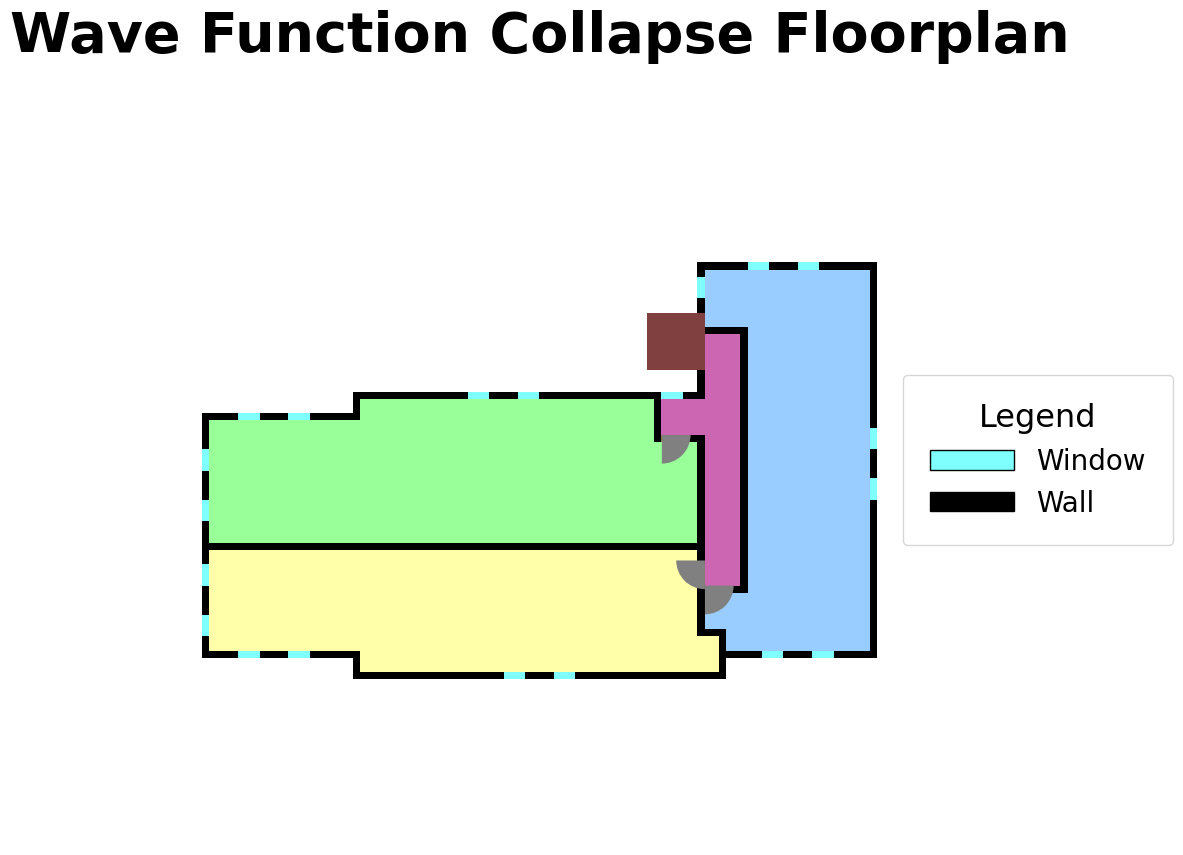

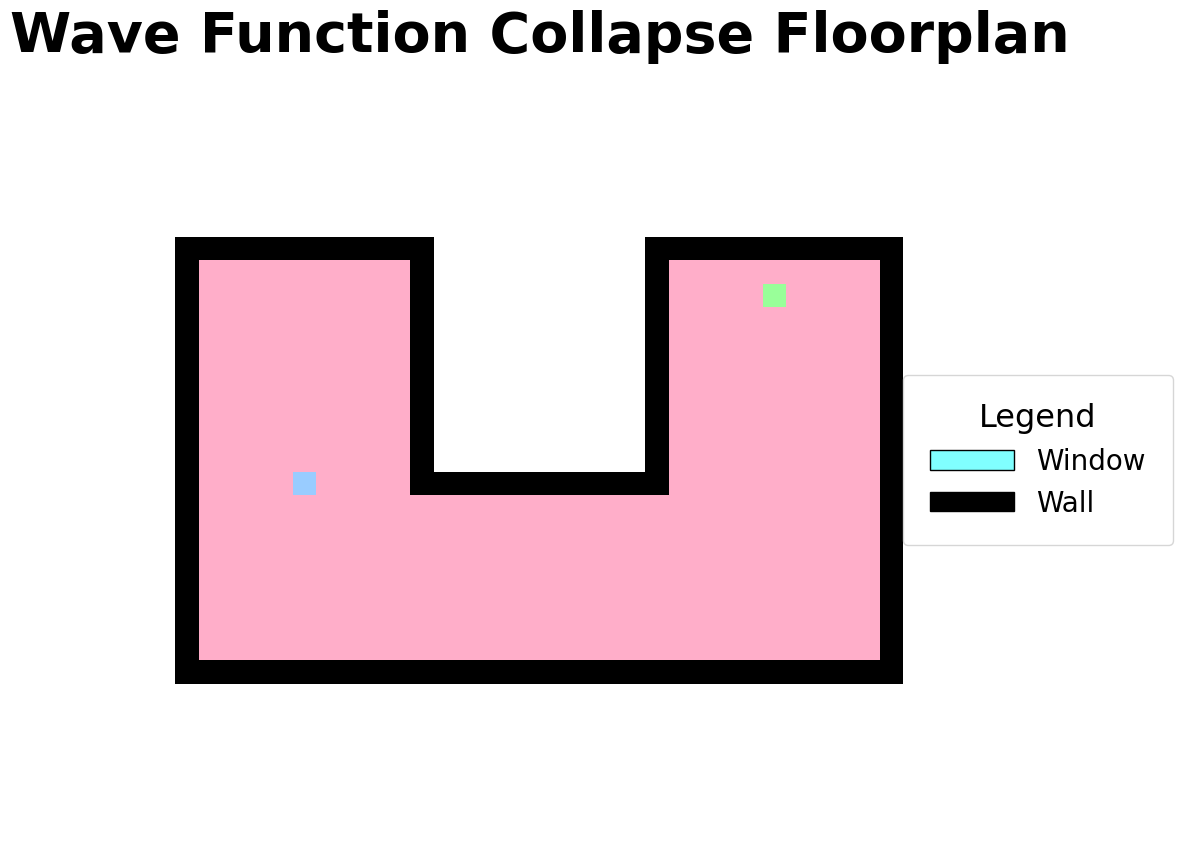

[(1, 1), (1, 31), (9, 11), (9, 21), (19, 1), (19, 11), (19, 21), (19, 31)]


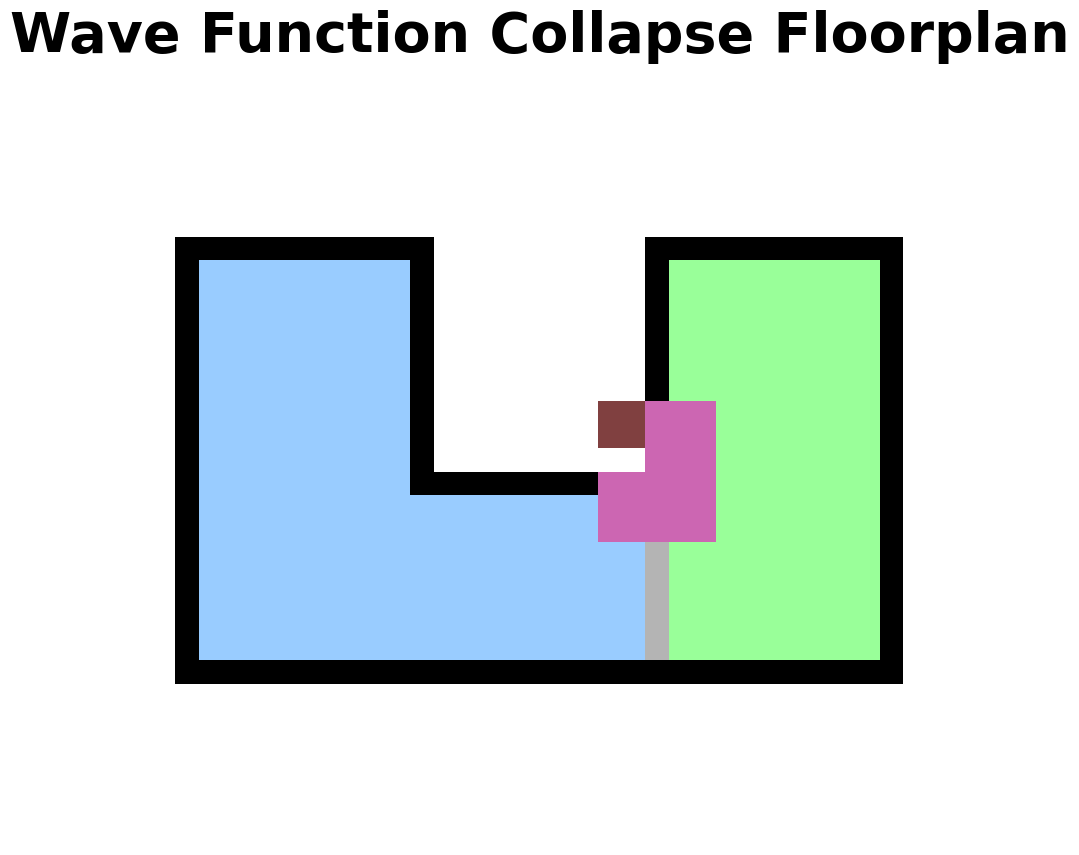

POOOGGGGG[129, 130, 20]
POOOGGGGG[130, 20]
POOOGGGGG[20]


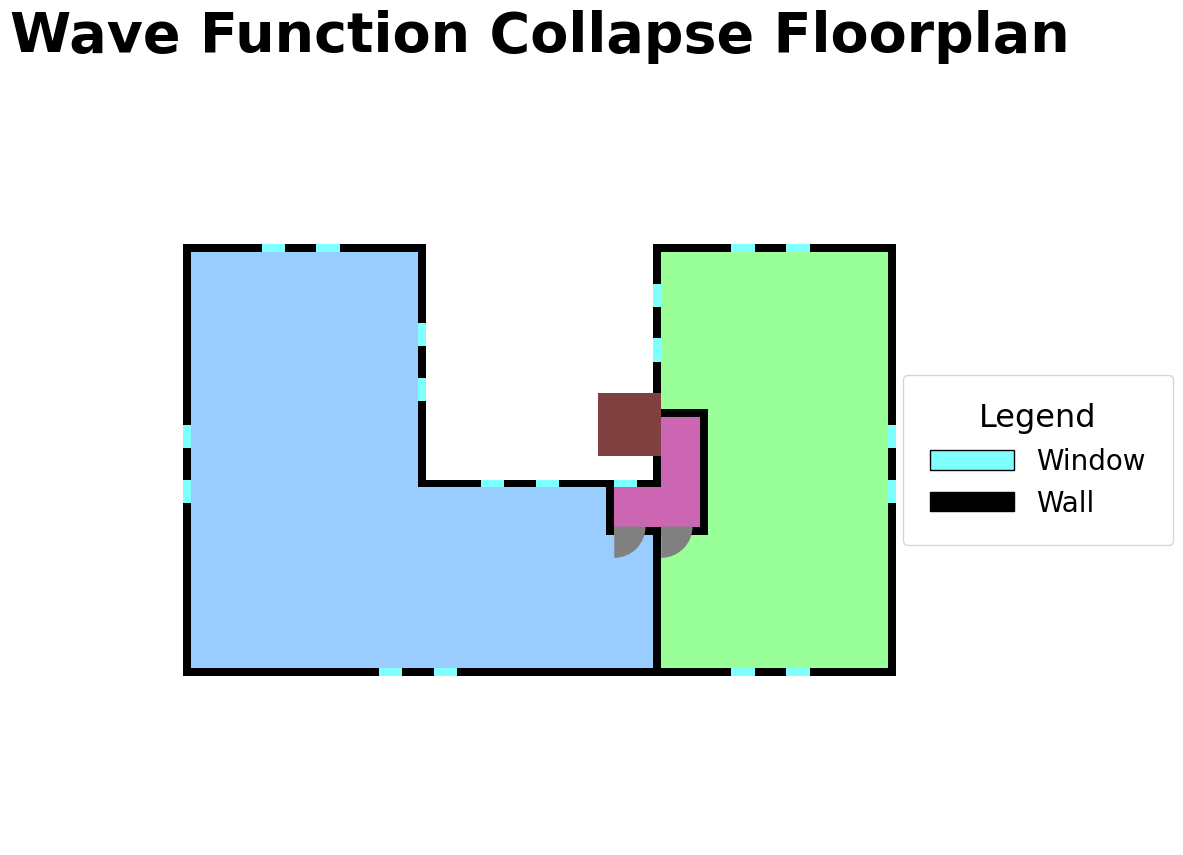

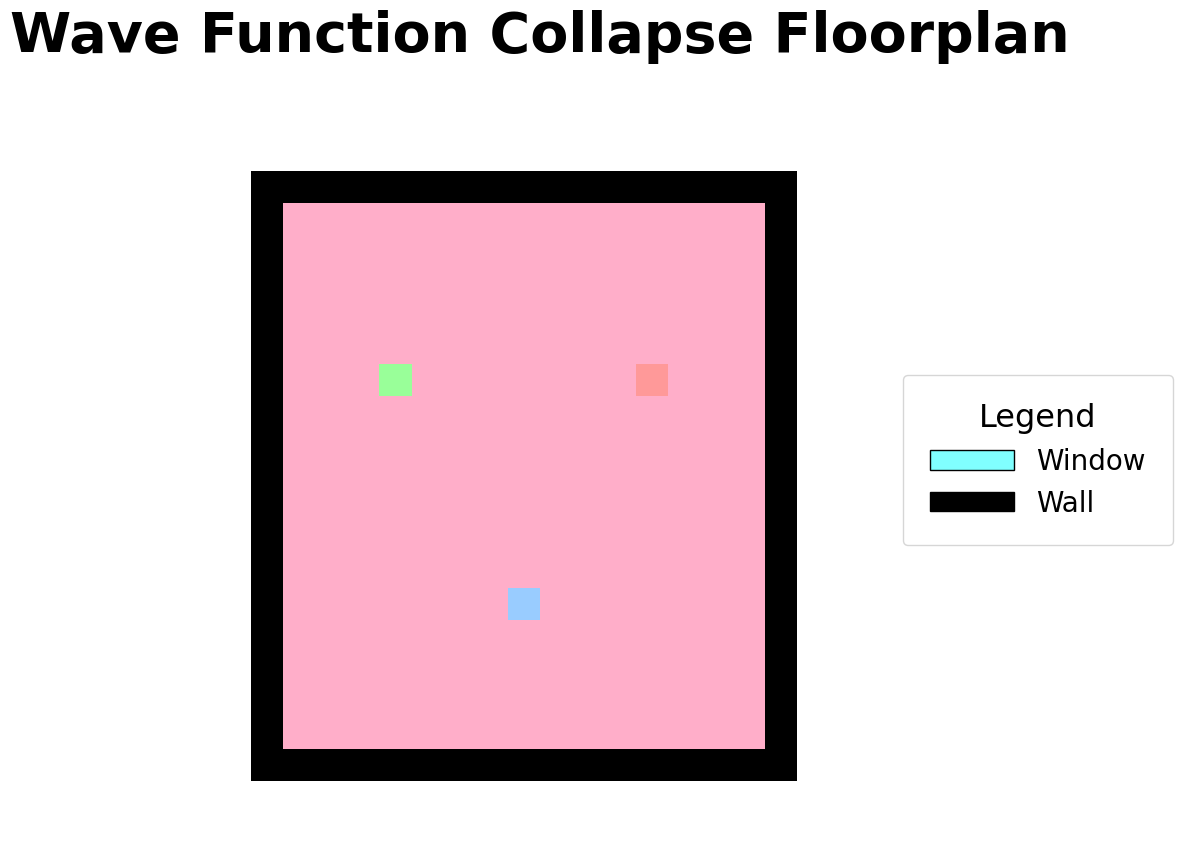

[(2, 2), (2, 18), (20, 2), (20, 18)]
CORNERRRRRRRRRRRRRRRRrrrr
CORNERRRRRRRRRRRRRRRRrrrr


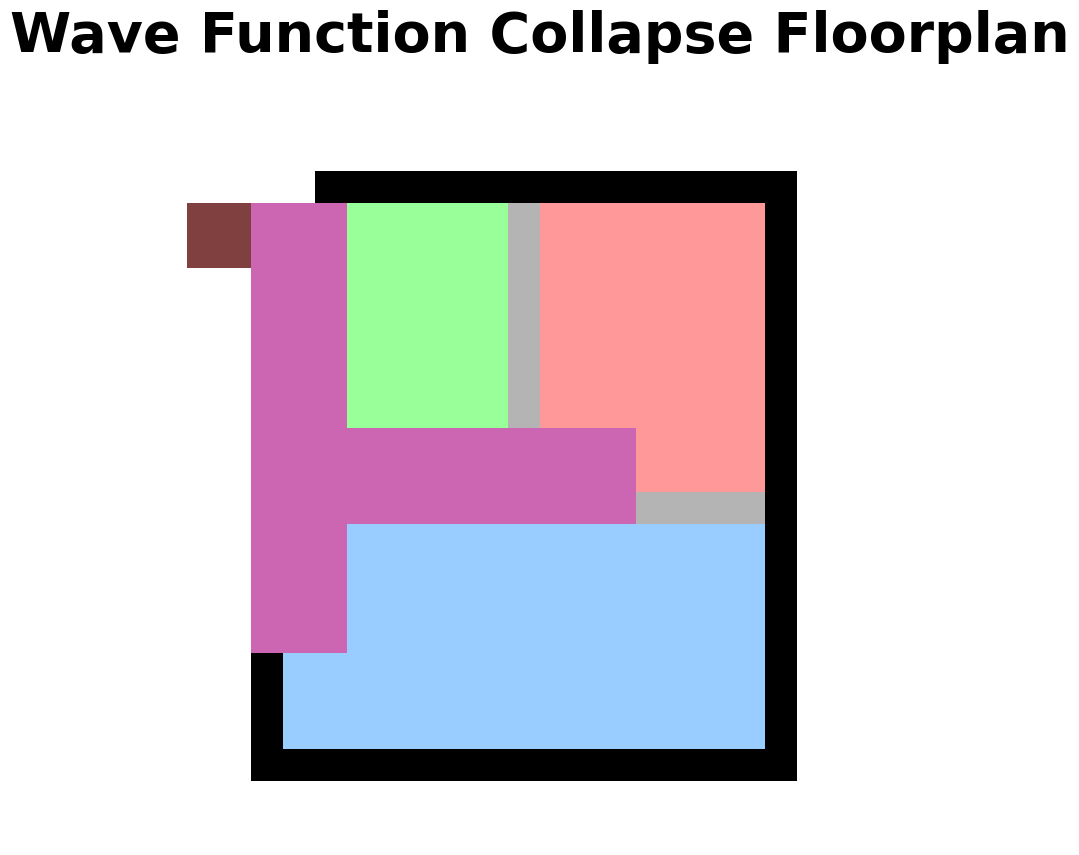

POOOGGGGG[129, 128, 130, 20]
POOOGGGGG[128, 130, 20]
POOOGGGGG[130, 20]
POOOGGGGG[20]


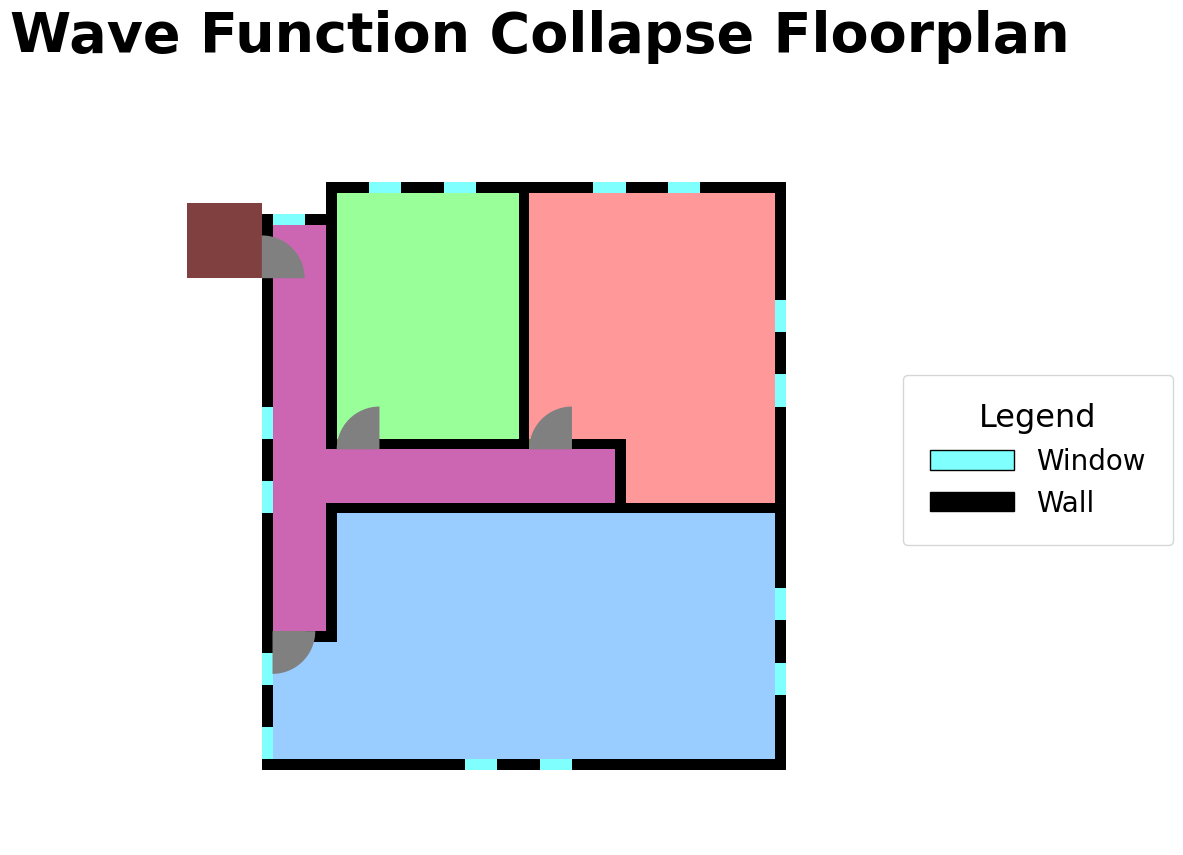

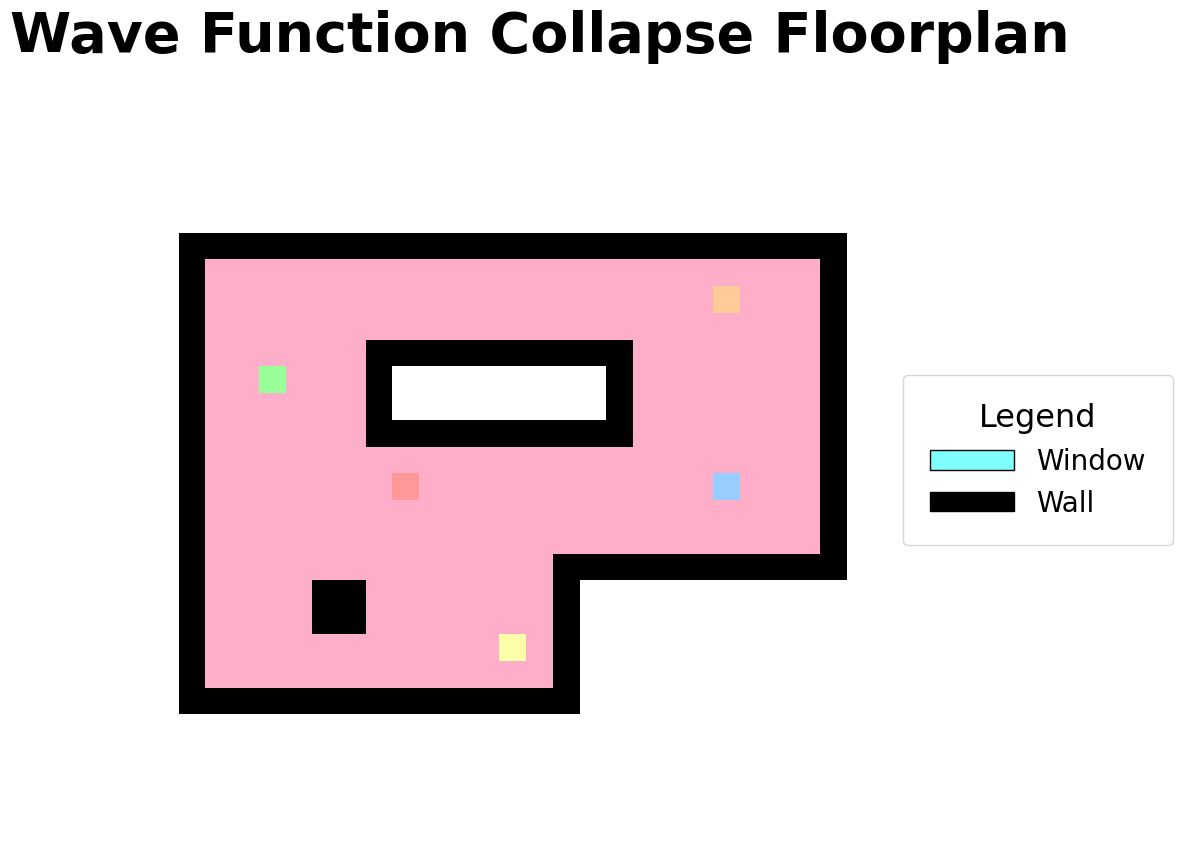

[(1, 1), (1, 15), (4, 6), (4, 7), (5, 6), (5, 7), (6, 15), (6, 25), (11, 8), (11, 17), (14, 8), (14, 17), (18, 1), (18, 25)]


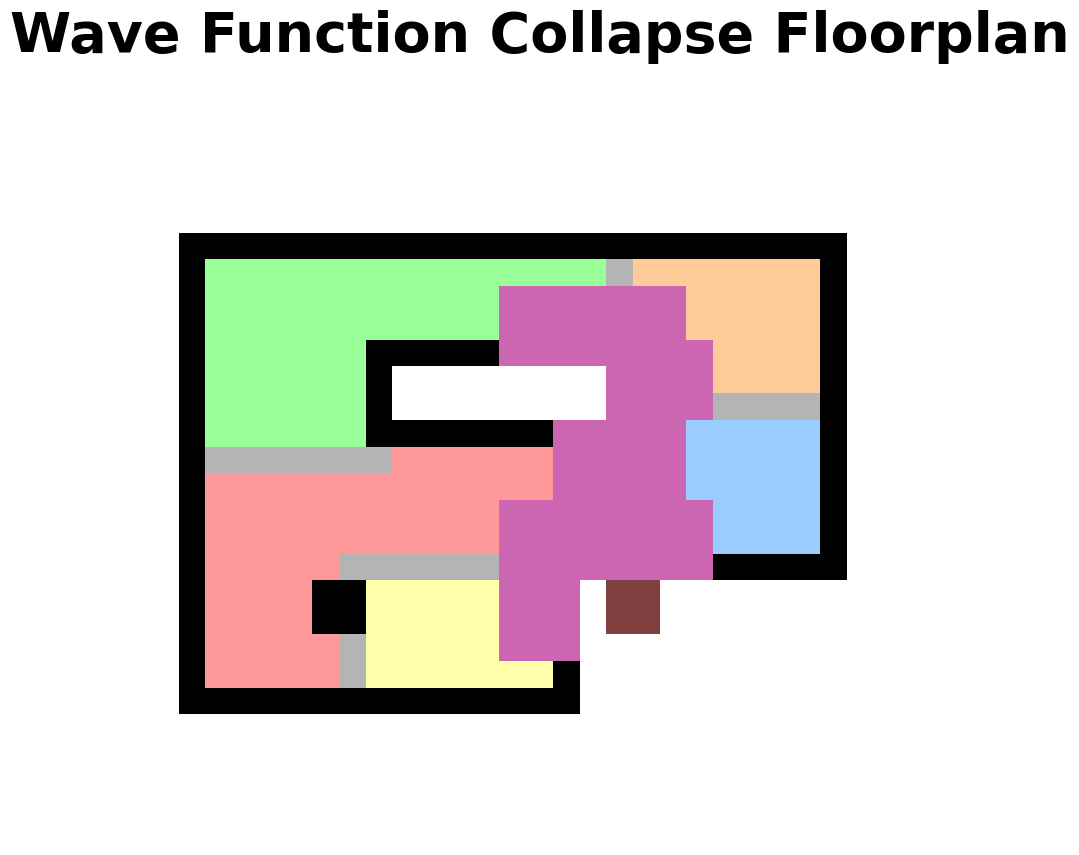

POOOGGGGG[128, 144, 20, 129, 130, 136]
POOOGGGGG[144, 20, 129, 130, 136]
POOOGGGGG[20, 129, 130, 136]
POOOGGGGG[129, 130, 136]
POOOGGGGG[130, 136]
POOOGGGGG[136]


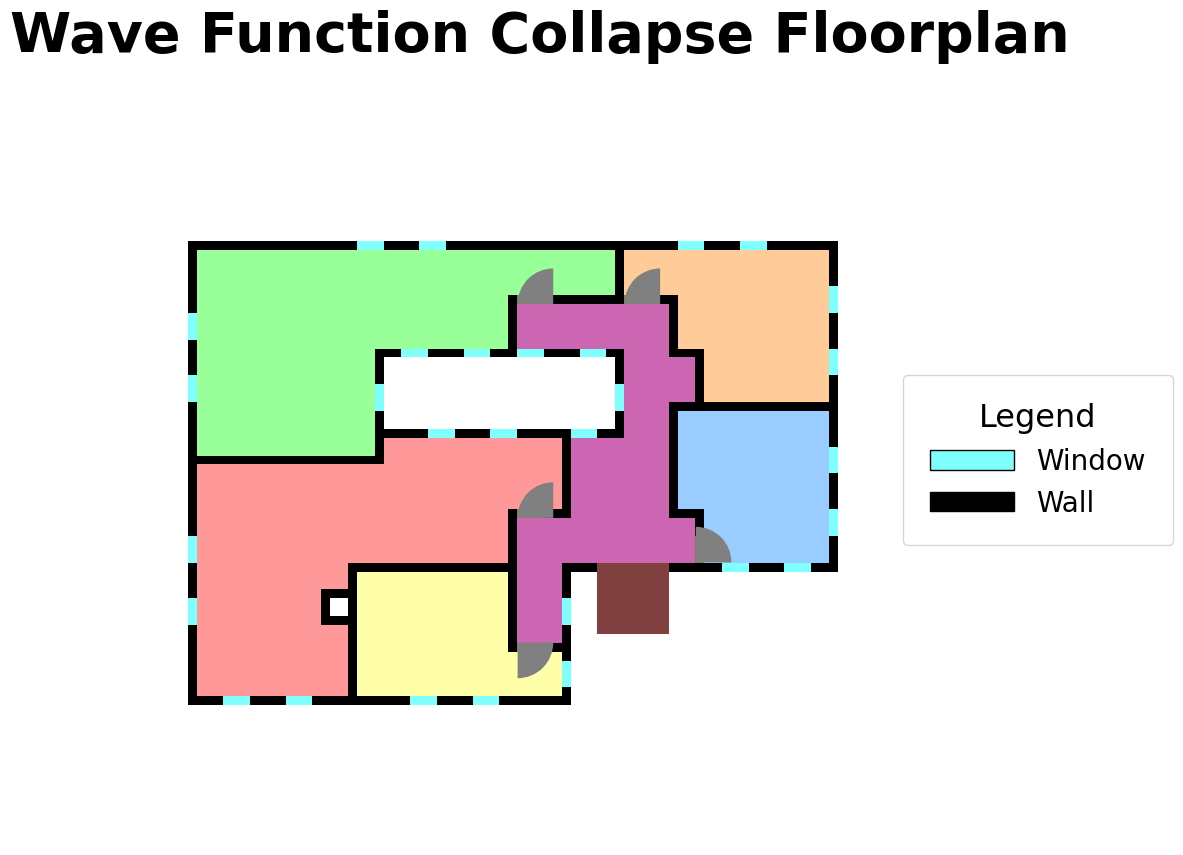

In [3]:
floorplans_int = []
all_seeds = []

for floorplan in floorplans:
    # 1) Convert raw image → integer grid + list of seed points
    floorplan_int, seed_list = image_to_int(floorplan)
    all_seeds.append(seed_list)

    # 2) Wrap into our FloorPlan class
    fp = FloorPlan(floorplan_int, seed_list)

    # 3) Visualize initial seeds
    fp.show(show_doors=True)

    # 4) Record the raw integer map
    floorplans_int.append(floorplan_int)

    # 5) Grow each seed into a rectangular room
    fp.grow_regions(rectangular=True)

    # 6) Place stairwells (2×2 by default)
    fp.generate_stairs()

    # 7) Carve and widen corridors between rooms
    fp.generate_corridors()

    # 8) Visualize after room growth, stairs, and corridors
    fp.show()

    # 9) Upscale each logical cell into a 3×3 pixel tile from pre-defined Wall cells
    fp.go_to_3x3()

    # 10) Re-encode the 3×3 tiles into integer codes and post-process
    fp.go_to_3x3int()

    # 11) Final visualization with doors highlighted
    fp.show(show_doors=True)
